<a href="https://colab.research.google.com/github/guneetnagia/LearnML/blob/math_differential_calculus/math_differential_calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# to get smooth animation
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

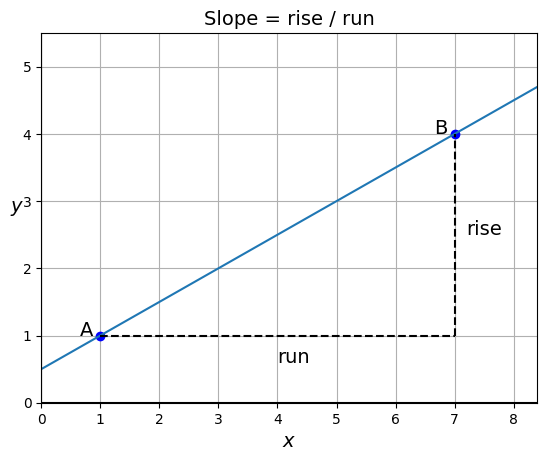

In [ ]:
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

def plot_rise_over_run(A_pos, B_pos):
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

A_pos = np.array([1, 1])
B_pos = np.array([7, 4])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

# slope of non-vertical line (straight line) is delta of Y/ Delta of X i.e. y(B)-y(A)/x(B)-x(A) = 3/6 = 0.5

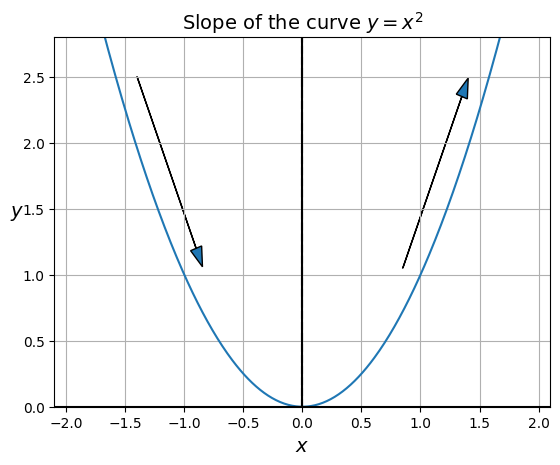

In [ ]:
# slope of curve

#@title
xs = np.linspace(-2.1, 2.1, 500)
ys = xs**2
plt.plot(xs, ys)

plt.plot([0, 0], [0, 3], "k--")
plt.arrow(-1.4, 2.5, 0.5, -1.3, head_width=0.1)
plt.arrow(0.85, 1.05, 0.5, 1.3, head_width=0.1)
show([-2.1, 2.1, 0, 2.8], title="Slope of the curve $y = x^2$")

In [ ]:
def animate_AB_line(f, fp, f_str, x_A, axis=None):
    y_A = f(x_A)
    eps = 1e-4
    x_B_range = 1.5
    x_B = x_A + eps

    n_frames = 200
    text_offset_A = -0.2
    text_offset_B = +0.1
    x_min, x_max = -1000, 1000

    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)

    # plot the tangent to the curve at point A
    if fp:
        slope = fp(x_A)
        offset = y_A - slope * x_A
        ax.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset],
                "y--")

    # plot the line AB and the labels A and B so they can be animated
    y_A = f(x_A)
    y_B = f(x_B)
    xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
    line_inf, = ax.plot(xs, ys, "-")
    line_AB, = ax.plot([x_A, x_B], [y_A, y_B], "bo-")
    ax.text(x_A + text_offset_A, y_A, "A", fontsize=14)
    B_text = ax.text(x_B + text_offset_B, y_B, "B", fontsize=14)

    # plot the grid and axis labels
    title = r"Slope of the curve $y = {}$ at $x_\mathrm{{A}} = {}$".format(f_str, x_A)
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    def update_graph(i):
        x_B = x_A + x_B_range * np.cos(i * 2 * np.pi / n_frames) ** 3
        if np.abs(x_B - x_A) < eps:
            x_B = x_A + eps # to avoid division by 0
        y_B = f(x_B)
        xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
        line_inf.set_data(xs, ys)
        line_AB.set_data([x_A, x_B], [y_A, y_B])
        B_text.set_position([x_B + text_offset_B, y_B])
        return line_inf, line_AB

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

animate_AB_line(lambda x: x**2, lambda x: 2*x, "x^2", -1)

In [ ]:
animate_AB_line(lambda x: np.abs(x), None, "|x|", 0)

In [ ]:
animate_AB_line(lambda x: np.cbrt(x), None, r"\sqrt[3]{x}", 0,
                axis=[-2.1, 2.1, -1.4, 1.4])


In [ ]:
# Plotting the tangent to a curve

def animate_tangent(f, fp, f_str):
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, 0, 2.8], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + "$ and the tangent at $x=x_athrm{A}$")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"y=f'(x) and the slope of the tangent at $x=x_athrm{A}$")

    def update_graph(i):
        x = 1.5 * np.sin(2 * np.pi * i / n_frames)
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data([x], [f_x])
        point_A2.set_data([x], [df_dx])
        return line_tangent, point_A1, point_A2

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return x**2

def fp(x):
  return 2*x

animate_tangent(f, fp, "x^2")

In [ ]:
animate_tangent(lambda x: np.sin(2*x**2) + 1, lambda x: 4*x*np.cos(2*x**2), r"\sin(2x^2)+1")

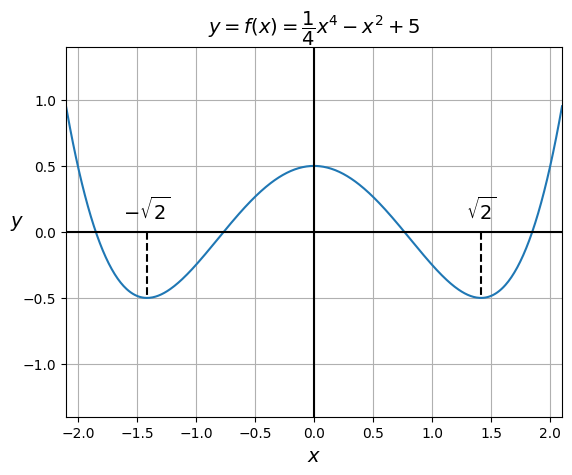

In [ ]:
def f(x):
  return 1/4 * x**4 - x**2 + 1/2

xs = np.linspace(-2.1, 2.1, 500)
ys = f(xs)
plt.plot(xs, ys)
plt.plot([np.sqrt(2), np.sqrt(2)], [0, f(np.sqrt(2))], "k--")
plt.plot([-np.sqrt(2), -np.sqrt(2)], [0, f(-np.sqrt(2))], "k--")
plt.text(-np.sqrt(2), 0.1, r"$-\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
plt.text(np.sqrt(2), 0.1, r"$\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
show(axis=[-2.1, 2.1, -1.4, 1.4], title=r"$y=f(x)=\dfrac{1}{4}x^4 - x^2 + 5$")

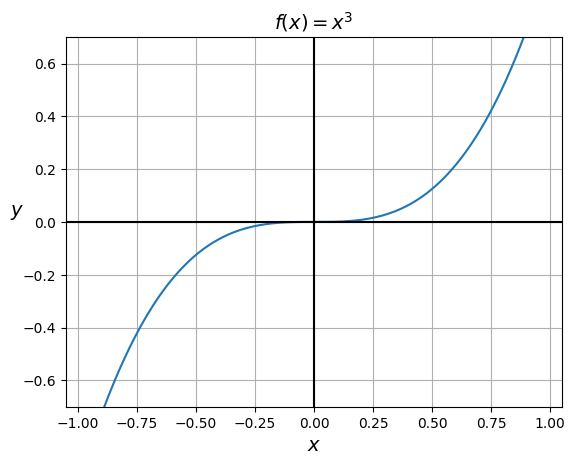

In [ ]:
def f(x):
  return x**3

xs = np.linspace(-1.05, 1.05, 500)
ys = f(xs)
plt.plot(xs, ys)
show(axis=[-1.05, 1.05, -0.7, 0.7], title=r"$f(x)=x^3$")

In [ ]:

"""
two main approaches to optimization really well.

🔹 1. Analytical Optimization

For simple functions, we can solve equations to find where the derivative = 0.

Then we check which of those points are minima or maxima.

This is exact and elegant, but in practice:

For complicated functions, the algebra can get very messy.

For neural networks with millions of parameters, it’s impossible to solve analytically.

🔹 2. Gradient Descent (Iterative Optimization)

Since solving exactly is often impossible, we use an approximate method:

Start with a random guess for the parameter values.

Compute the slope (derivative) at that point.

Take a small step in the opposite direction of the slope (downhill).

Repeat many times.

Eventually, you land in a valley (a minimum).

🔹 3. Why Gradient Descent Works

If the slope is steep → the update step is big.

If the slope is small (near a flat region) → steps get smaller.

That’s why the process naturally slows down near a minimum.

But there’s a twist:

You might stop at a local minimum instead of the true global minimum.

That’s why people say “cross your fingers”.

🔹 4. Learning Rate (the hyperparameter)

The learning rate controls how big each step is.

Too small → the algorithm is very slow.

Too big → you overshoot and bounce around (or even diverge).

Getting the learning rate “just right” is super important in practice.

✅ Super short takeaway:

Gradient Descent: keep stepping downhill using the slope → approximate solution.

Works for any differentiable function, which is why it’s used for neural networks.
"""

'\ntwo main approaches to optimization really well.\n\n🔹 1. Analytical Optimization\n\nFor simple functions, we can solve equations to find where the derivative = 0.\n\nThen we check which of those points are minima or maxima.\n\nThis is exact and elegant, but in practice:\n\nFor complicated functions, the algebra can get very messy.\n\nFor neural networks with millions of parameters, it’s impossible to solve analytically.\n\n🔹 2. Gradient Descent (Iterative Optimization)\n\nSince solving exactly is often impossible, we use an approximate method:\n\nStart with a random guess for the parameter values.\n\nCompute the slope (derivative) at that point.\n\nTake a small step in the opposite direction of the slope (downhill).\n\nRepeat many times.\n\nEventually, you land in a valley (a minimum).\n\n🔹 3. Why Gradient Descent Works\n\nIf the slope is steep → the update step is big.\n\nIf the slope is small (near a flat region) → steps get smaller.\n\nThat’s why the process naturally slows down 

In [ ]:
#@title
def animate_gradient_descent(f, fp, f_str, x_0):
    learning_rate = 0.01
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, -1.4, 1.4], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + "$ and the tangent $")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"$y=f'(x)$ and the slope of the tangent $")

    xs = []
    x = x_0
    for index in range(n_frames):
      xs.append(x)
      slope = fp(x)
      x = x - slope * learning_rate

    def update_graph(i):
        x = xs[i]
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data([x], [f_x])
        point_A2.set_data([x], [df_dx])
        return line_tangent, point_A1, point_A2

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return 1/4 * x**4 - x**2 + 1/2

def fp(x):
  return x**3 - 2*x

animate_gradient_descent(f, fp, r"\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}",
                         x_0=1/4)


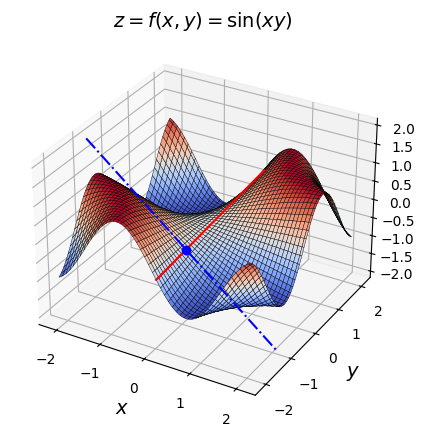

In [ ]:
# partial derivatives

def plot_3d(f, title):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(-2.1, 2.1, 100)
    ys = np.linspace(-2.1, 2.1, 100)
    xs, ys = np.meshgrid(xs, ys)
    zs = f(xs, ys)

    surface = ax.plot_surface(xs, ys, zs,
                              cmap="coolwarm",
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)
    ax.set_title(title, fontsize=14)
    return ax

def plot_tangents(ax, x_A, y_A, f, df_dx, df_dy):
    ax.plot3D([x_A], [y_A], f(x_A, y_A), "bo", zorder=10)
    x_min, x_max = -2.1, 2.1
    slope_x = df_dx(x_A, y_A)
    offset_x = f(x_A, y_A) - slope_x * x_A
    ax.plot3D([x_min, x_max], [y_A, y_A],
              [slope_x * x_min + offset_x, slope_x * x_max + offset_x], "b-.",
              zorder=5)
    y_min, y_max = -2.1, 2.1
    slope_y = df_dy(x_A, y_A)
    offset_y = f(x_A, y_A) - slope_y * y_A
    ax.plot3D([x_A, x_A], [y_min, y_max],
              [slope_y * y_min + offset_y, slope_y * y_max + offset_y], "r-",
              zorder=5)

def f(x, y):
    return np.sin(x * y)

def df_dx(x, y):
    return y * np.cos(x * y)

def df_dy(x, y):
    return x * np.cos(x * y)

ax = plot_3d(f, r"$z = f(x, y) = \sin(xy)$")
plot_tangents(ax, 0.1, -1, f, df_dx, df_dy)

plt.show()

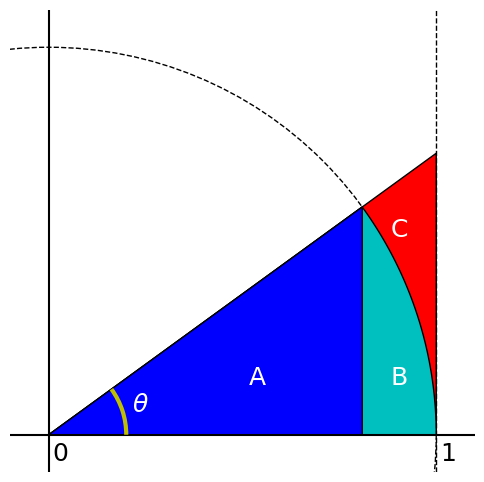

In [ ]:
angle = np.pi/5
A_pos = [np.cos(angle), np.sin(angle)]

fig, ax = plt.subplots(figsize=(6, 6))

from functools import partial
ax_text = partial(ax.text, color="w", fontsize=18, zorder=4,
                  horizontalalignment='center', verticalalignment='center')

circle = plt.Circle((0, 0), 1,
                    zorder=0, facecolor='w', edgecolor='k', linestyle="--")
triangle1 = plt.Polygon([[0, 0], [1, np.tan(angle)], [1, 0]],
                        zorder=1, facecolor='r', edgecolor='k')
arc_points = np.array([[0, 0]] + [[np.cos(a), np.sin(a)]
              for a in np.linspace(0, angle, 50)])
ax.fill(arc_points[:, 0], arc_points[:, 1],
        zorder=2, facecolor='c', edgecolor='k')
triangle2 = plt.Polygon([[0, 0], A_pos, [A_pos[0], 0]],
                        zorder=3, facecolor='b', edgecolor='k')
ax_text(2*np.cos(angle)/3, np.sin(angle)/4, "A")
ax_text((1+np.cos(angle))/2, np.sin(angle)/4, "B")
ax_text((1+np.cos(angle))/2, 0.9*np.sin(angle), "C")
ax_text(0.25*np.cos(angle/2), 0.25*np.sin(angle/2), r"$\theta$")
arc = mpl.patches.Arc([0, 0], 2*0.2, 2*0.2, theta1=0, theta2=angle*180/np.pi,
                      zorder=5, color='y', linewidth=3)
ax_text(0.03, -0.05, "0", color='k')
ax_text(1.03, -0.05, "1", color='k')

ax.axhline(y=0, color='k', zorder=4)
ax.axvline(x=0, color='k', zorder=4)
ax.axvline(x=1, color='k', zorder=4, linewidth=1, linestyle='--')
ax.axis('equal')
ax.axis([-0.1, 1.1, -0.1, 1.1])
ax.axis('off')
ax.add_artist(circle)
ax.add_artist(triangle1)
ax.add_artist(triangle2)
ax.add_patch(arc)
plt.show()